In [1]:
# control chart
# https://github.com/carlosqsilva/pyspc/blob/master/tests/pyspc_test.py

In [2]:
!pip install pyspc

In [8]:
# look at the sample data
pistonrings

array([[74.03 , 74.002, 74.019, 73.992, 74.008],
       [73.995, 73.992, 74.001, 74.011, 74.004],
       [73.988, 74.024, 74.021, 74.005, 74.002],
       [74.002, 73.996, 73.993, 74.015, 74.009],
       [73.992, 74.007, 74.015, 73.989, 74.014],
       [74.009, 73.994, 73.997, 73.985, 73.993],
       [73.995, 74.006, 73.994, 74.   , 74.005],
       [73.985, 74.003, 73.993, 74.015, 73.988],
       [74.008, 73.995, 74.009, 74.005, 74.004],
       [73.998, 74.   , 73.99 , 74.007, 73.995],
       [73.994, 73.998, 73.994, 73.995, 73.99 ],
       [74.004, 74.   , 74.007, 74.   , 73.996],
       [73.983, 74.002, 73.998, 73.997, 74.012],
       [74.006, 73.967, 73.994, 74.   , 73.984],
       [74.012, 74.014, 73.998, 73.999, 74.007],
       [74.   , 73.984, 74.005, 73.998, 73.996],
       [73.994, 74.012, 73.986, 74.005, 74.007],
       [74.006, 74.01 , 74.018, 74.003, 74.   ],
       [73.984, 74.002, 74.003, 74.005, 73.997],
       [74.   , 74.01 , 74.013, 74.02 , 74.003],
       [73.988, 74.0

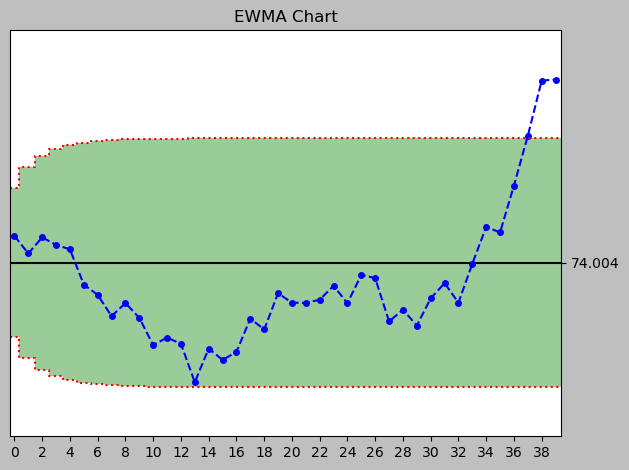

<pyspc: (88248853456)>


In [3]:
from pyspc import *

a = spc(pistonrings) + ewma()
print(a)

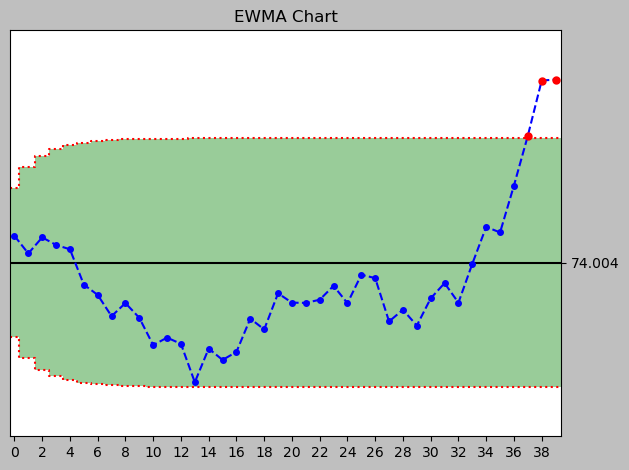

<pyspc: (88248853456)>

In [4]:
# adding rules highlighting...
a + rules()

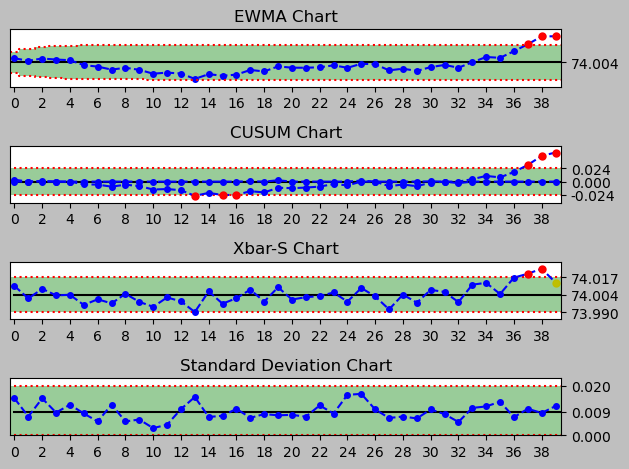

<pyspc: (88248853456)>

In [5]:
# adding more control charts to the mix...
a + cusum() + xbar_sbar() + sbar()

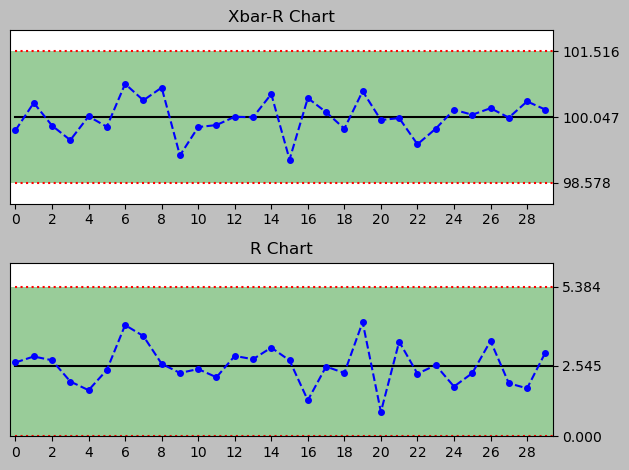

<pyspc: (88270990084)>


In [6]:
import numpy
from pyspc import *
fake_data = numpy.random.randn(30, 5) + 100
a = spc(fake_data) + xbar_rbar() + rbar() + rules()
print(a)

In [9]:
# $ python3 pyspc_gui.py

In [10]:
# use directly code

month = ['2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07',
        '2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02',
        '2022-03','2022-04','2022-05','2022-06','2022-07','2022-08','2022-09',
        '2022-10','2022-11','2022-12','2023-01','2023-02','2023-03','2023-04']
diameter['month']= month
diameter

In [37]:
# df= diameter
# change data
data = {'month': ['2021-01','2021-02','2021-03','2021-04','2021-05','2021-06','2021-07', '2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02',
        '2022-03','2022-04','2022-05','2022-06','2022-07','2022-08','2022-09', '2022-10','2022-11','2022-12','2023-01','2023-02','2023-03','2023-04'],
        'X1': [0.211,0.175,0.152,0.150,0.207,0.136,0.212,0.166,0.141,0.157,0.197,0.172,0.183,0.166,
               0.164,0.141,0.186,0.127,0.149,0.155,0.210,0.197,0.191,0.211,0.158,0.201,0.332, 0.123]}
  
# Create DataFrame
df = pd.DataFrame(data)
df


,month,X1
0,2021-01,0.211
1,2021-02,0.175
2,2021-03,0.152
3,2021-04,0.150
4,2021-05,0.207
5,2021-06,0.136
6,2021-07,0.212
7,2021-08,0.166
8,2021-09,0.141
9,2021-10,0.157


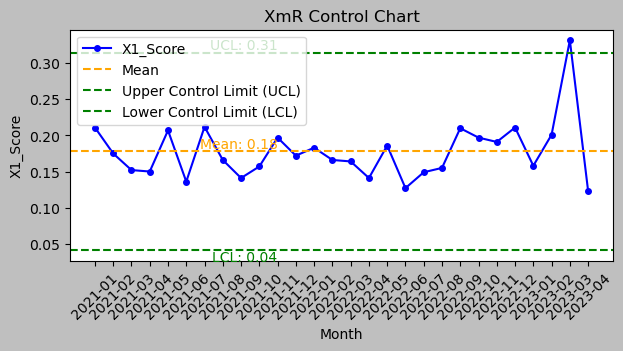

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns 'month' and 'x-_score'
# Ensure the 'month' column is of datetime type for proper plotting

# Step 1: Calculate the moving range (MR)
df['MR'] = df['X1'].diff().abs()

# Step 2: Calculate the moving average (Xbar)
df['Xbar'] = df['X1'].rolling(window=2).mean()

# Step 3: Calculate the control limits
Xbar_mean = df['Xbar'].mean()
MR_mean = df['MR'].mean()
A2 = 1.880  # Constant for sample size 2 (constants can vary based on sample size)
UCL = Xbar_mean + (3.267 * MR_mean)  # 3.267 is the constant for UCL based on sample size 2
LCL = Xbar_mean - (3.267 * MR_mean)  # 3.267 is the constant for LCL based on sample size 2
df['UCL'] = UCL
df['LCL'] = LCL

# Step 4: Plot the XmR control chart
plt.figure(figsize=(7, 3))
plt.plot(df['month'], df['X1'], 'bo-', label='X1_Score')
# plt.plot(df['month'], df['Xbar'], 'r-', label='Moving Average (Xbar)')
plt.axhline(y=Xbar_mean, color='orange', linestyle='--', label='Mean')
plt.axhline(y=UCL, color='g', linestyle='--', label='Upper Control Limit (UCL)')
plt.axhline(y=LCL, color='g', linestyle='--', label='Lower Control Limit (LCL)')

# Add text annotations for UCL, LCL, and mean values
plt.text(df['month'].iloc[10], UCL, f'UCL: {UCL:.2f}', ha='right', va='bottom', color='g')
plt.text(df['month'].iloc[10], LCL, f'LCL: {LCL:.2f}', ha='right', va='top', color='g')
plt.text(df['month'].iloc[10], Xbar_mean, f'Mean: {Xbar_mean:.2f}', ha='right', va='bottom', color='orange')


plt.xlabel('Month')
plt.ylabel('X1_Score')
plt.title('XmR Control Chart')
plt.legend(loc='best')
plt.xticks(rotation=45)
# plt.grid(True)
plt.show()


In [18]:
#!/usr/bin/env python3
from pyspc import *

a = spc(pistonrings) + cusum() + ewma() + rules()

b = spc(pistonrings) + xbar_sbar() + sbar() + rules()
#print(b)
c = spc(viscosidade) + xmr() + mr() + cusum() + rules()
#print(c)
d = spc(plastic) + Tsquare_single() + rules()
#print(d)
e = spc(experiment) + Tsquare()
#print(e)
f = spc(mewma_example) + mewma() + rules()
#print(f)

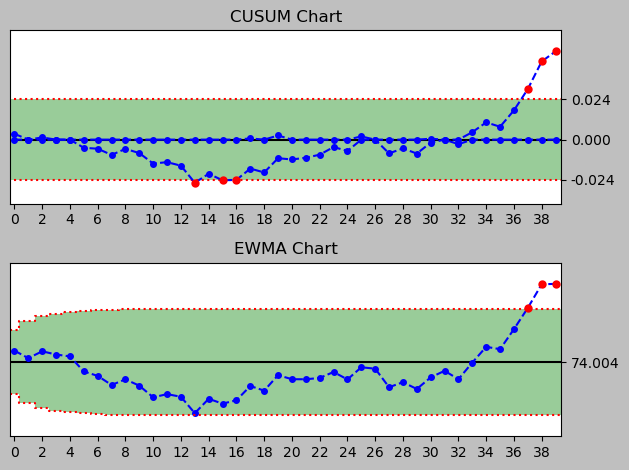

<pyspc: (88271539872)>


In [19]:
print(a)

In [22]:
df['X1']

0     0.211
1     0.175
2     0.152
3     0.150
4     0.207
5     0.136
6     0.212
7     0.166
8     0.141
9     0.157
10    0.197
11    0.172
12    0.183
13    0.166
14    0.164
15    0.141
16    0.186
17    0.127
18    0.149
19    0.155
20    0.210
21    0.197
22    0.191
23    0.211
24    0.158
25    0.201
26    0.332
27    0.123
Name: X1, dtype: float64

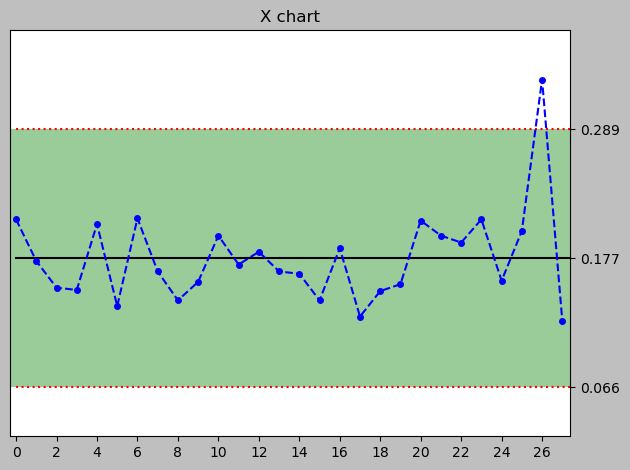

<pyspc: (88273219190)>


In [35]:
c = spc(df['X1'])  + xmr()
print(c)

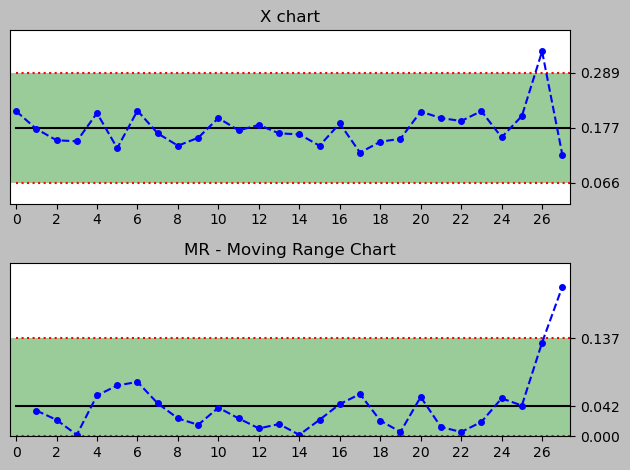

<pyspc: (88273250374)>


In [34]:
c = spc(df['X1']) + xmr() + mr() # + cusum() + rules()
print(c)

In [ ]:
https://sixsigmastudyguide.com/xmr-charts/

In [ ]:
Remember to NEVER put specifications on any kind of control chart, including the XmR chart.
Use an X Bar S chart when the subgroup size is > 10.
Use an X Bar R chart when the subgroup size is between 2 & 10.
Use an XmR chart when the sample size is 1 && there is a lot of data.
Use an ImR chart when the subgroup size is 1 && there is NOT a lot of data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns: 'year_month', 'score', 'period', 'event'

# Sort the DataFrame by 'year_month' if necessary
df = df.sort_values('year_month')

# Calculate moving range (MR)
df['MR'] = df['score'].diff().abs()

# Calculate moving range mean (MRbar) based on 'period'
df['MRbar'] = df.groupby('period')['MR'].transform('mean')

# Calculate X-bar mean (Xbar) based on 'period'
df['Xbar'] = df.groupby('period')['score'].transform('mean')

# Create subgroup identifiers
df['Subgroup'] = df.groupby('period').cumcount() // 2 + 1

# Create XmR chart plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot X-bar chart
ax.plot(df['Subgroup'], df['Xbar'], marker='o', color='blue', label='X-bar')

# Plot MR chart
ax.plot(df['Subgroup'], df['MR'], marker='o', color='red', label='MR')

# Plot MRbar line
ax.axhline(df['MRbar'].mean(), color='red', linestyle='--', label='MRbar')

# Set plot labels and title
ax.set_xlabel('Subgroup')
ax.set_ylabel('Value')
ax.set_title('XmR Chart')

# Add legend
ax.legend()

# Display the plot
plt.show()


In [ ]:
https://www.winspc.com/the-difference-between-winspc-subgroup-size-subrange-size-and-sample-size/#:~:text=The%20subgroup%20size%20can%20be,the%20samples%20of%20that%20subgroup.
    

In [ ]:
The term subgroup size applies to a variable characteristic and controls how many samples (also called data values or individual readings) make up a single plotted point on a control chart (called a ‘subgroup’). The subgroup size can be any whole number (integer) greater than or equal to 1.

If your subgroup size is 1, an ‘X & MR’ chart is commonly used to display the data. On the ‘X’ chart, the subgroup represents each individual sample, while on the ‘MR’ chart (‘Moving Range’ chart), the subgroup represents the range of the values of consecutive subgroups. The number of subgroups taken into account when calculating the moving range value is controlled by the subrange size.

The subrange size must be a whole number that is 2 or greater and is only applicable when the subgroup size is 1. 
For example, if your subgroup size is 1 and your subrange size is 3,
then the plotted value for any subgroup on the ‘MR’ chart is the largest ‘X’ value of the previous 3 ‘X’ subgroups (including the current subgroup) minus the smallest ‘X’ value of the previous 3 ‘X’ subgroups (including the current subgroup).

To choose the appropriate subgroup size for an XmR chart when subgroup = 1, you typically need to consider the following factors:

Stability and patterns in the data: If the data exhibits clear patterns or trends, it may indicate that the subgroup size is too small. Increasing the subgroup size can help smooth out the variation and provide a more accurate representation of the process.

Cost and feasibility: Choosing a larger subgroup size may require more resources, time, or effort to collect the data. It's essential to strike a balance between the benefits gained from larger subgroups and the practicality of data collection.

Frequency of data collection: The frequency at which data is collected can influence the choice of subgroup size. If data is collected frequently, a smaller subgroup size may be sufficient to capture the process variation adequately. However, if data is collected infrequently, a larger subgroup size might be necessary to capture enough information about the process.

Control Limits Factor (A2): The value of A2 depends on the subgroup size (n). There are standard tables available that provide A2 values for various subgroup sizes. For example, for a subgroup size of 2, A2 is typically 1.880, while for a subgroup size of 5, A2 is 0.577.